## Problem Statement:- 
#### Perform Principal component analysis and perform clustering using first 
#### 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain 
#### optimum number of clusters and check whether we have obtained same number of clusters with the original data 
#### (class column we have ignored at the begining who shows it has 3 clusters)df

## Principal Component Analysis

In [8]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

In [9]:
df = pd.read_csv(r"C:\DS Assignments\Assignment 8(PCA)\wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [11]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [12]:
df.shape

(178, 14)

In [13]:
# Considering only numerical data 
df1 = df.iloc[:,1:]
df1.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [14]:
# Converting into numpy array
wine = df1.values
wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [15]:
# Normalizing the numerical data 
df_normal = scale(wine)

In [16]:
df_normal

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [17]:
pca = PCA()
pca_values = pca.fit_transform(df_normal)

In [18]:
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [19]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(df_normal)

In [20]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [21]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [22]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

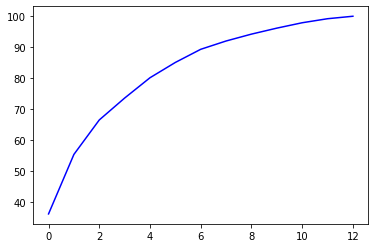

In [67]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="blue")

In [24]:
pca_values[:,0:1]

array([[ 3.31675081],
       [ 2.20946492],
       [ 2.51674015],
       [ 3.75706561],
       [ 1.00890849],
       [ 3.05025392],
       [ 2.44908967],
       [ 2.05943687],
       [ 2.5108743 ],
       [ 2.75362819],
       [ 3.47973668],
       [ 1.7547529 ],
       [ 2.11346234],
       [ 3.45815682],
       [ 4.31278391],
       [ 2.3051882 ],
       [ 2.17195527],
       [ 1.89897118],
       [ 3.54198508],
       [ 2.0845222 ],
       [ 3.12440254],
       [ 1.08657007],
       [ 2.53522408],
       [ 1.64498834],
       [ 1.76157587],
       [ 0.9900791 ],
       [ 1.77527763],
       [ 1.23542396],
       [ 2.18840633],
       [ 2.25610898],
       [ 2.50022003],
       [ 2.67741105],
       [ 1.62857912],
       [ 1.90269086],
       [ 1.41038853],
       [ 1.90382623],
       [ 1.38486223],
       [ 1.12220741],
       [ 1.5021945 ],
       [ 2.52980109],
       [ 2.58809543],
       [ 0.66848199],
       [ 3.07080699],
       [ 0.46220914],
       [ 2.10135193],
       [ 1

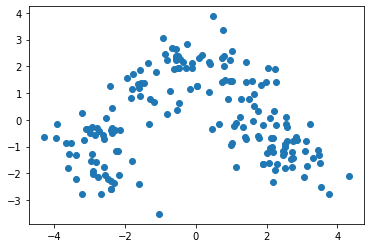

In [25]:
# plot between PCA1 and PCA2 
x = pca_values[:,0:1]
y = pca_values[:,1:2]
z = pca_values[:,2:3]
plt.scatter(x,y)

In [29]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), df[['Type']]], axis = 1)
finalDf

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

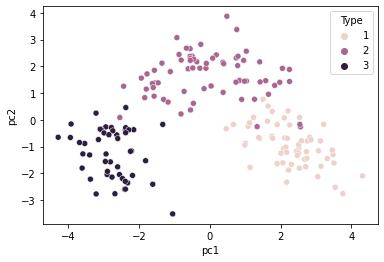

In [30]:
import seaborn as sns
sns.scatterplot(data=finalDf,x='pc1',y='pc2',hue='Type')

## Clustering

### Heirarchial Clustering

In [31]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn

In [32]:
finalDf

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [33]:
finalDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pc1     178 non-null    float64
 1   pc2     178 non-null    float64
 2   pc3     178 non-null    float64
 3   Type    178 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 5.7 KB


In [34]:
finalDf.describe()

,pc1,pc2,pc3,Type
count,1.780000e+02,1.780000e+02,1.780000e+02,178.000000
mean,1.995907e-16,6.736185e-17,3.617581e-17,1.938202
std,2.175417e+00,1.584639e+00,1.205920e+00,0.775035
min,-4.280639e+00,-3.515090e+00,-4.585064e+00,1.000000
25%,-2.172762e+00,-1.233675e+00,-8.311875e-01,1.000000
50%,6.051146e-02,-2.620302e-01,-1.416121e-01,2.000000
75%,2.001293e+00,1.398300e+00,7.600610e-01,3.000000
max,4.312784e+00,3.871784e+00,5.345388e+00,3.000000


In [35]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [37]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(finalDf.iloc[:,0:3])
df_norm.head()

,pc1,pc2,pc3
0,0.884094,0.280447,0.445028
1,0.755241,0.520989,0.257653
2,0.790998,0.336264,0.560688
3,0.935332,0.102712,0.443975
4,0.615534,0.358103,0.665806


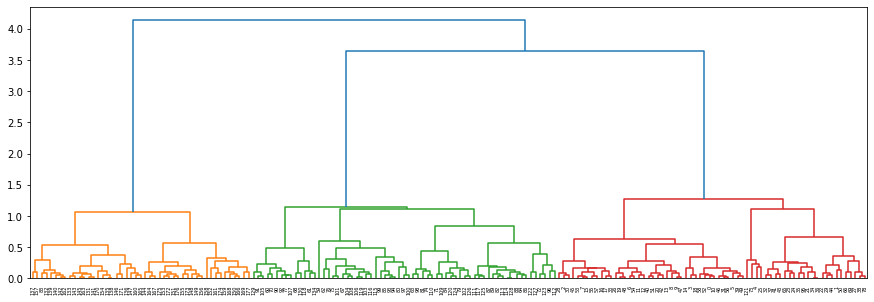

In [39]:
# create dendrogram
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

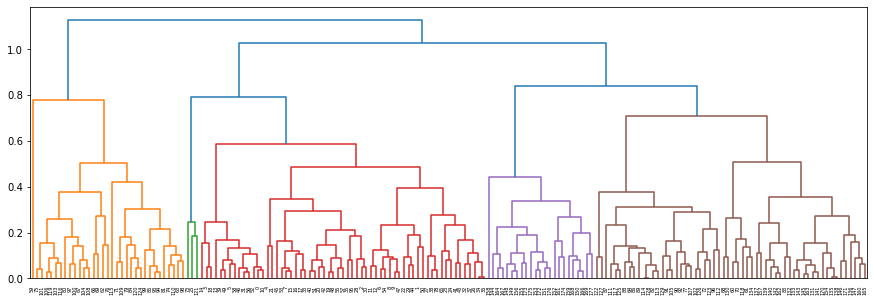

In [40]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

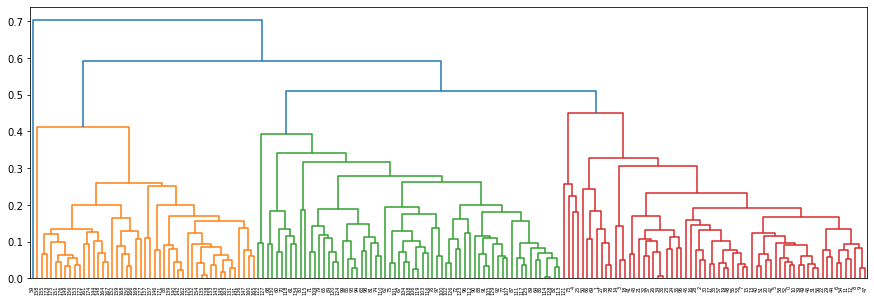

In [41]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='average'))

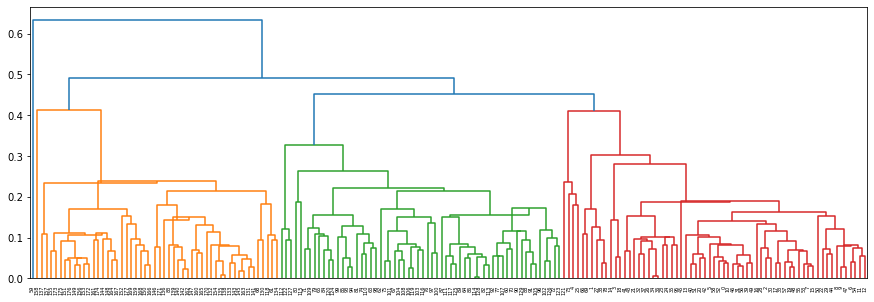

In [43]:
plt.figure(figsize=(15,5))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='centroid'))

In [44]:
# create clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'single')

In [45]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [46]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,0
174,0
175,0
176,0


In [47]:
finalDf['h_clusterid'] = Clusters
finalDf

,pc1,pc2,pc3,Type,h_clusterid
0,3.316751,-1.443463,-0.165739,1,0
1,2.209465,0.333393,-2.026457,1,0
2,2.516740,-1.031151,0.982819,1,0
3,3.757066,-2.756372,-0.176192,1,0
4,1.008908,-0.869831,2.026688,1,0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,0
174,-2.601956,-1.757229,0.207581,3,0
175,-2.677839,-2.760899,-0.940942,3,0
176,-2.387017,-2.297347,-0.550696,3,0


In [48]:
Clusters.value_counts()

Clusters
0           175
3             1
2             1
1             1
dtype: int64

## Kmeans Clustering

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [53]:
finalDf1= finalDf.iloc[:,0:4]
finalDf1

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [54]:
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_final_df = scaler.fit_transform(finalDf1.iloc[:,0:3])

In [55]:
scaled_final_df

array([[ 1.52895179e+00, -9.13478982e-01, -1.37825595e-01],
       [ 1.01851648e+00,  2.10983913e-01, -1.68516534e+00],
       [ 1.16016384e+00, -6.52552421e-01,  8.17294251e-01],
       [ 1.73192758e+00, -1.74433875e+00, -1.46517953e-01],
       [ 4.65085422e-01, -5.50462585e-01,  1.68535731e+00],
       [ 1.40610238e+00, -1.34313751e+00, -5.23394199e-01],
       [ 1.12897840e+00, -7.43490601e-01, -8.12534459e-01],
       [ 9.49356728e-01, -1.01821406e+00,  1.21645371e-01],
       [ 1.15745981e+00, -5.80990809e-01, -1.47270585e+00],
       [ 1.26936420e+00, -4.99586692e-01, -8.18482431e-01],
       [ 1.60408482e+00, -8.24166841e-01, -3.51538969e-01],
       [ 8.08903878e-01, -3.87282859e-01, -9.90312897e-01],
       [ 9.74261323e-01, -4.27613105e-01, -7.19390243e-01],
       [ 1.59413696e+00, -7.15506314e-01, -1.00145446e+00],
       [ 1.98810193e+00, -1.32641441e+00, -1.05104701e+00],
       [ 1.06264288e+00, -1.05212704e+00,  1.81203879e-01],
       [ 1.00122533e+00, -1.47280883e+00

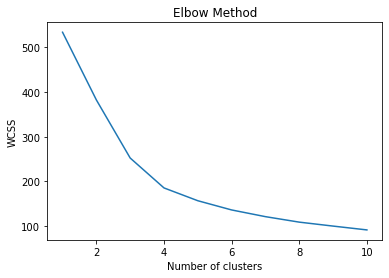

In [56]:
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_final_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#Basically Elbow plot/scree plot used to identify the best K-value, In this case the best 'k' values is k=4.

In [57]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_final_df)

KMeans(n_clusters=4, random_state=42)

In [58]:
clusters_new.labels_

array([1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 3, 3, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 0, 3, 2, 3, 3,
       3, 3, 2, 3, 2, 2, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 3, 2, 3,
       2, 2, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [59]:
#Assign clusters to the data set
finalDf1['clusterid_new'] = clusters_new.labels_

In [60]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-1.26489346, -0.76838677, -0.14739409],
       [ 1.10836034, -0.67739235, -0.17981557],
       [ 0.06328767,  1.11480069, -0.75456902],
       [ 0.02188816,  0.8207979 ,  1.19542523]])

In [61]:
finalDf1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,pc1,pc2,pc3,Type
,,mean,mean,mean,mean
0,0,-2.743930,-1.214191,-0.177245,2.979592
1,1,2.404363,-1.070403,-0.216233,1.018868
2,2,0.137290,1.761587,-0.907390,1.921053
3,3,0.047482,1.297010,1.437532,1.894737


In [62]:
finalDf1

,pc1,pc2,pc3,Type,clusterid_new
0,3.316751,-1.443463,-0.165739,1,1
1,2.209465,0.333393,-2.026457,1,2
2,2.516740,-1.031151,0.982819,1,1
3,3.757066,-2.756372,-0.176192,1,1
4,1.008908,-0.869831,2.026688,1,3
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,0
174,-2.601956,-1.757229,0.207581,3,0
175,-2.677839,-2.760899,-0.940942,3,0
176,-2.387017,-2.297347,-0.550696,3,0


In [63]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_final_df)

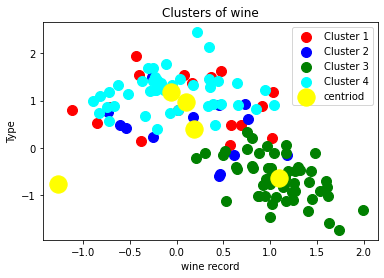

In [73]:
plt.scatter(scaled_final_df[y_kmeans == 0, 0], scaled_final_df[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(scaled_final_df[y_kmeans == 1, 0], scaled_final_df[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(scaled_final_df[y_kmeans == 2, 0], scaled_final_df[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(scaled_final_df[y_kmeans == 3, 0], scaled_final_df[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centriod')
plt.title('Clusters of wine')
plt.xlabel('wine record')
plt.ylabel('Type')
plt.legend()
plt.show()

In [ ]:
#This scatter plot visualised the 4 clusters, centroid of all the clusters is also visualised.